In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras

In [2]:
mnist = keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [8]:
x_train , x_test = x_train / 255.0, x_test / 255.0

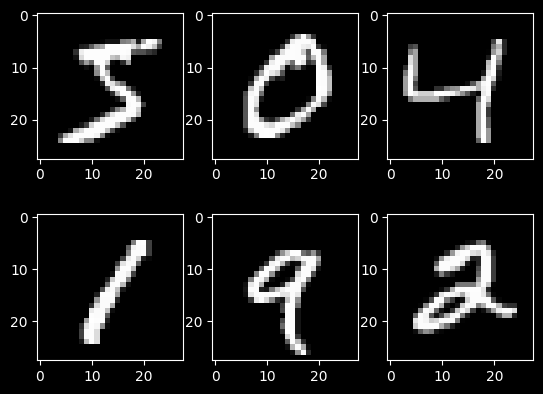

In [9]:
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')
plt.show()

In [115]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.ReLU(),
    keras.layers.Dense(256),
    keras.layers.ReLU(),
    keras.layers.Dense(64),
    keras.layers.Dense(10)
])

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 re_lu (ReLU)                (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 256)               200960    
                                                                 
 re_lu_1 (ReLU)              (None, 256)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                16448     
                                                                 
 dense_13 (Dense)            (None, 10)                650       
                                                                 
Total params: 218058 (851.79 KB)
Trainable params: 21

In [116]:
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='auto')
optim = keras.optimizers.Adam(learning_rate=0.0001)
metrics = ['accuracy']

In [117]:
model.compile(optimizer=optim, loss=loss, metrics=metrics)

In [118]:
batch_size = 64
epochs = 10

In [119]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, shuffle=True, verbose=2, workers=4, use_multiprocessing=True)

Epoch 1/10
750/750 - 4s - loss: 0.6140 - accuracy: 0.8438 - val_loss: 0.2890 - val_accuracy: 0.9222 - 4s/epoch - 6ms/step
Epoch 2/10
750/750 - 3s - loss: 0.2682 - accuracy: 0.9257 - val_loss: 0.2245 - val_accuracy: 0.9368 - 3s/epoch - 4ms/step
Epoch 3/10
750/750 - 3s - loss: 0.2100 - accuracy: 0.9409 - val_loss: 0.1863 - val_accuracy: 0.9499 - 3s/epoch - 4ms/step
Epoch 4/10
750/750 - 3s - loss: 0.1726 - accuracy: 0.9511 - val_loss: 0.1585 - val_accuracy: 0.9569 - 3s/epoch - 4ms/step
Epoch 5/10
750/750 - 3s - loss: 0.1457 - accuracy: 0.9585 - val_loss: 0.1434 - val_accuracy: 0.9603 - 3s/epoch - 4ms/step
Epoch 6/10
750/750 - 3s - loss: 0.1255 - accuracy: 0.9649 - val_loss: 0.1301 - val_accuracy: 0.9638 - 3s/epoch - 4ms/step
Epoch 7/10
750/750 - 3s - loss: 0.1095 - accuracy: 0.9699 - val_loss: 0.1212 - val_accuracy: 0.9639 - 3s/epoch - 4ms/step
Epoch 8/10
750/750 - 3s - loss: 0.0967 - accuracy: 0.9734 - val_loss: 0.1100 - val_accuracy: 0.9684 - 3s/epoch - 4ms/step
Epoch 9/10
750/750 - 3s 

In [120]:
loss, accuracy = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=2, workers=4, use_multiprocessing=True)
print('Test loss: ', loss)
print('Test accuracy: ', accuracy)

print("-"*80)
if accuracy > 0.95:
    print('Good accuracy!')
else:
    print('Bad accuracy')
print("-"*80)

157/157 - 1s - loss: 0.0978 - accuracy: 0.9727 - 514ms/epoch - 3ms/step
Test loss:  0.09784489125013351
Test accuracy:  0.9726999998092651
--------------------------------------------------------------------------------
Good accuracy!
--------------------------------------------------------------------------------


In [121]:
probability_model = keras.Sequential([
    model,
    keras.layers.Softmax()
])

predictions = probability_model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [122]:
import numpy as np
from PIL import Image

def preprocess_image(image_path, target_size=(28, 28)):
    image = Image.open(image_path)
    grayscale_image = image.convert('L')
    resized_image = grayscale_image.resize(target_size, Image.ANTIALIAS)
    image_array = np.array(resized_image)
    image_array = image_array / 255.0

    return np.array([image_array])

C:\Users\joshi\AppData\Local\Temp\ipykernel_9920\2457580104.py:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  resized_image = grayscale_image.resize(target_size, Image.ANTIALIAS)


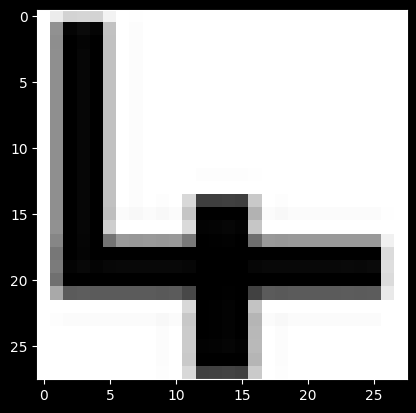

In [123]:
input_data = preprocess_image('4.png')

# Plot the image
plt.imshow(input_data[0], cmap='gray')
plt.show()

In [124]:
prediction = probability_model.predict(input_data.reshape(1, 28, 28))

1/1 [==============================] - 0s 30ms/step


In [125]:
predicted_number = np.argmax(prediction, axis=1)

print('Predicted number: ', predicted_number)

Predicted number:  [5]


In [126]:
# Must improve the model